In [2]:
#Importamos las bibliotecas necesarias
import cv2 #para imágenes, Open CV (Computer Vision)
import numpy as np
import matplotlib.pyplot as plt

In [32]:
im1_lung=cv2.imread('lung_chanfleada.png',0) #leemos la imagen en escala de grises

In [33]:
im1_lung.shape

(658, 648)

Imagen de 658x648 con 3 canales

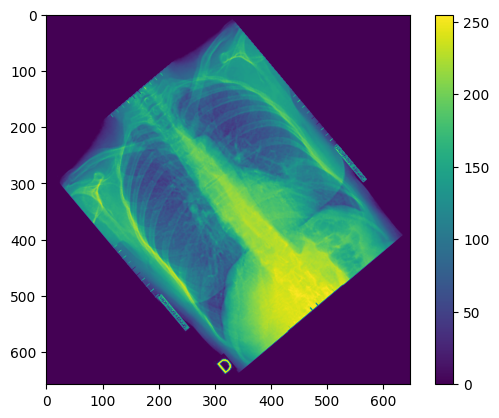

In [36]:
plt.imshow(im1_lung) #mostramos la imagen en escala de grises
plt.colorbar() #mostramos la barra de colores

(658, 648, 3)


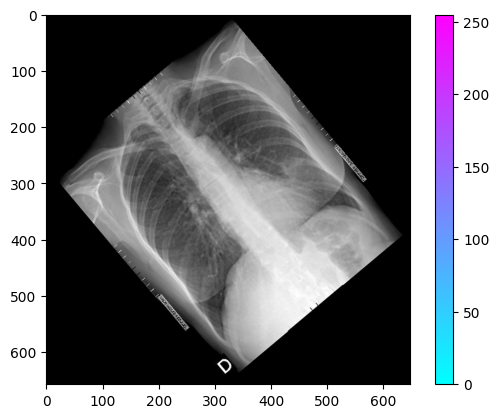

In [37]:
im1_lung_gray=cv2.cvtColor(im1_lung,cv2.COLOR_BGR2RGB) #convertimos la imagen a escala de grises
print(im1_lung_gray.shape)
plt.imshow(im1_lung_gray,cmap='cool') #mostramos la imagen en escala de grises
plt.colorbar() #mostramos la barra de colores

In [23]:
im1_lung.dtype

dtype('uint8')